# Intro to Superresolution

## Boilerplate

Import python packages in a boilerplate cell.  

**NOTE:** Importing a package with `import *` will allow you to call functions within that package without specifying the package. For example, if you choose to import the entire numpy package the import will look like this:

                             `from numpy import *`

Importing with `*` is a quick and dirty way of importing a package. If you import in this way, you should have a good idea of what each package contains. Remember that different packages use different syntax, so specifying the package will help make your code more readable to you and others. To avoid this ambiguity, you can import numpy with an ancronym. For example: 

                             `import numpy as np`

This method is cleaner in the sense that you must specify the package (e.g. `np`, `plt`, etc.) before calling the function. Consider this as you work through the assignemnt and when looking at the provided examples. 

Learn more about python modules by reading [6.1 More on Modules](https://docs.python.org/2/tutorial/modules.html).

In [1]:
%matplotlib inline
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.lines
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import scipy.special
from scipy.stats import chisquare
#from scipy.stats.mstats import chisquare as cstest
from scipy.stats import *
from scipy.stats.mstats import *

Imports for the interactive widgets:

In [2]:
from ipywidgets import interact, interactive, fixed
#from IPython.html import widgets
#from IPython.display import display, display_png, display_svg, clear_output
#from IPython.core.pylabtools import print_figure

Define points to be used later:

In [3]:
xdist = arange(-80,80,0.1)
ydist = xdist

Define some useful functions:

In [4]:
xdata = arange(0,5,0.1)

def fexp(x,a,b,c):
    return a*exp(-b*x)+c

def fgau(x,a=1,b=1,c=1):
    return a*exp(-(x-b)**2/(2*c**2))

def fairy(x,a,b,c):
    return a*(scipy.special.jv(1,abs(x-b)*c)/(c*abs(x-b)))**2

def ddata(x,ns):
    noise = ns*randn(len(x))
    return fexp(x,2.5,1.3,0.5) + noise

ydata = ddata(xdata,0.2)

## The principles of localizing single isotropic point sources

Estimating a fluorophore position from an image is, in some sense, an exercise in geometry: without noise, an image of an isotropic light emitter would be a disk (possibly surrounded by diffraction rings) centered on the position of the fluorophore. The position is generally estimated by the center of the point spread function (PSF) of the fluorophore.

The PSF of an imaging system describes the shape of the blur formed when a point source is imaged; it is proportional to the average number of photons at a given position relative to the source. High-accuracy PSF calculations require accounting for numerous factors, particularly the collection angle (numerical aperture) of the lens, interfaces between the sample and lens (such as coverslips and immersion oil) and the dipole moment of the light source.

For an isotropic point source (emitting light equally in all directions), the most common models used in high-precision work are the Richards-Wolf model, which accounts for the vector nature of light waves, and the Gibson-Lanni model, which also accounts for coverslips and other interfaces between the sample and the lens. As long as the lens is well-corrected for aberrations, the general pattern will be a central bright spot whose width corresponds roughly to the wavelength of light. However, although software is available for computing the Richards-Wolf and Gibson-Lanni PSFs (for example, an ImageJ plug-in), the formulas are complicated and are computationally costly. Many investigators therefore approximate the PSF with an Airy function, which is somewhat simpler for mathematical calculations. The Airy PSF is most valid when the lens has a low numerical aperture, but it has sufficient qualitatively validity to be a useful approximation in many investigations

## The Airy PSF formula that dictates the ideal point spread function emmitted from a point dipole source

$$
I(x,y) = \frac{\pi^4}{\epsilon_0^2 n n^\prime} \frac{\mu^2}{\lambda^6} \frac{NA^4}{M^2} \left[ \frac{J_1(2 \pi \tilde{\rho})}{2 \pi \tilde{\rho}} \right]^2, \space \space \tilde{\rho}= \frac{NA (x^2+y^2)}{M \lambda}
$$

where:

$\epsilon_0$ is Permitivity of Free Space

$n$ and $n^\prime$ are the relative Index of Refraction of both the medium and objective respectivetly

$\mu$ is Dipole Moment

$NA$ is the Numerical Aperature Factor that specifies the width of the PSF

$M$ is the Magnification Factor

$\lambda$ is Wavelength of light

$J_1()$ is a Bessel Function of the first kind

$\tilde{\rho}$ is the relative distance away from the PSF center




interactive(children=(Text(value='0', description='x_0'), Text(value='0', description='y_0'), Text(value='600', description='l'), Text(value='60', description='M'), Text(value='1.4', description='NA'), Output()), _dom_classes=('widget-interact',))

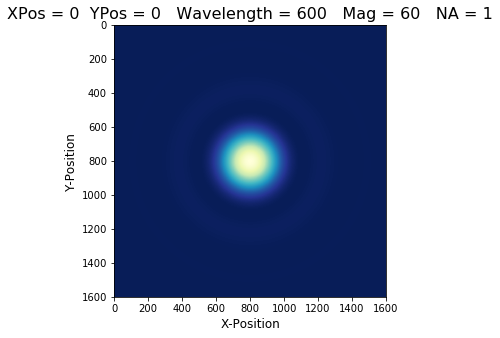

In [5]:
@interact(x_0 =u'0',
          y_0 = u'0',
          l = u'600',
          M = u'60',
          NA = u'1.4')

def plot_airy(x_0=0,
              y_0=0,
              l = 600,
              M = 60,
              NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    y_0 = np.float(y_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)

    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy-y_0)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially

    
    # Plot the graphs!
    figure(1)
    plt.figure(figsize=(5,5))
    imshow(I, cmap='YlGnBu_r', interpolation='nearest');
    title('XPos = %d  YPos = %d   Wavelength = %d   Mag = %d   NA = %d' % (x_0, y_0, l, M, NA),
          fontsize=16)
    xlabel('X-Position', fontsize=12)
    ylabel('Y-Position', fontsize=12)

    figure(2)
    plt.figure(figsize=(5,5))
    plot(xdist,I[I.shape[1]/2+y_0/0.1,:], lw= 4);
    title(r"Easier to see in 1-D",
          fontsize=16)
    xlabel('X-Position', fontsize=12)
    ylabel('Normalized Intensity', fontsize=12)

## Fit Gaussian to our Airy Function

Even the Airy PSF is still tedious for many practical
calculations. Consequently, people often approximate the PSF of
an isotropic source with a Gaussian function:

$$
I(x,y) = I_0*exp(-NA*k^2((x-x_0)^2+(y-y_0)^2))+b
$$

where:

$k$ is $2\pi$ divided by the wavelength of light in the sample

$NA$ is the Numerical Aperature Factor that specifies the width of the PSF

$x_0$ and $y_0$ are the center of the Gaussian PSF

##So how good of a fit is this Gaussian Function?

In [6]:
@interact(x_0 = u'0',
          l = u'600',
          M = u'60',
          NA = u'1.4')
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
          
    #Jury rigging the code
    x_0 = np.float(x_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
          
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    

    pg,cg = curve_fit(fgau,xdist,I[I.shape[1]/2,:])
    
    
    ygau = fgau(xdist,*pg)
    
    #Calculating Chi^2
    data = I[I.shape[1]/2,:]
    expected_values=scipy.array(data)
    observed_values=scipy.array(ygau)
    Xmin,pvalue = chisquare(observed_values, f_exp=expected_values,ddof=3)
    pvalue = np.float(pvalue)
    Xmin = np.float(Xmin)
    Xv = Xmin/(xdist.shape[0]-3)
    #chi = np.array([Xv,pvalue])
    
    
    plt.figure(figsize=(10,10))
    plot(xdist,I[I.shape[1]/2,:],'b-',label='Data',lw= 4)

    plot(xdist,ygau,'g-',label='Gau fit', lw= 4)
    legend()
    print('')
    t = Table()
    t['Normalization'] = [pg[0]]
    t['FWHM'] = [2.0*math.sqrt(2.0*math.log(10.0))*pg[2]]
    t['Center'] = [pg[1]]
    print(t)
    
    print('')

    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cg))[0]]
    tstddev['FWHM std dev'] = [sqrt(diag(cg))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cg))[1]]
    print(tstddev)
    
    print('')
    
    print('Gau fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pg))
    print('Gau fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cg))))
    
    print('')
    print('Chi Squared Goodnes of Fit Test')
    chitable = Table()
    chitable['Xv'] = [Xv]
    chitable['PValue'] = [pvalue]
    print(chitable)

interactive(children=(Text(value='0', description='x_0'), Text(value='600', description='l'), Text(value='60', description='M'), Text(value='1.4', description='NA'), Output()), _dom_classes=('widget-interact',))

Indeed, almost any realistic PSF will look roughly similar to a Gaussian bell curve near the peak of a focused image which is the main reason why the Gaussian approximation gives useful and reasonably accurate results in many investigations involving focused images of fluorophores

But in reality, experiments cannot obtain this detailed resolution of the PSF. We are limited by the tools that we use. In our example of a collecting photons from a point dipole source, we are limited in our spatial resolution by our pixels. This implementation issue is called "pixelation". The signal on a pixel is the sum of the photons striking different parts of it, which is proportional to the integral of the PSF over the pixel area.

If the size of the pixel is substantially smaller than the PSF width (a fraction of a wavelength in the object plane, for a typical diffraction-limited PSF), the signal can usually be approximated with the PSF value at the center of the pixel. However, if the pixel is larger, or if high precision is required, the integral of the PSF over the pixel area must be used (for example, an error function for the Gaussian PSF)

In [7]:
@interact(x_0 = u'0',
          y_0 = u'0',
          l = u'600',
          M = u'60',
          NA = u'1.4', 
          pixelsize = u'16')
def plot_airy(x_0=0, y_0=0, l = 600, M = 60, NA = 1.4,pixelsize = 16):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    y_0 = np.float(y_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    pixelsize = np.float(pixelsize)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy-y_0)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #Usable Pixel Numbers
    print('Pixel = 2,4,5,8,10,16,20,25,32,40,50,64,80,100,160,200,320,400,800,1600')
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(pixelsize,1600/pixelsize,pixelsize,1600/pixelsize)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    ypixel = xpixel
    centerpixel = xpixel-5
    barsize = 9
    
    figure(1)
    plt.figure(figsize=(10,10))
    imshow(pixel,cmap='YlGnBu_r',interpolation = 'nearest')
    title('XPos = %d  YPos = %d   Wavelength = %d   Mag = %d   NA = %d  Pixel Size = %d' %
          (x_0, y_0, l, M, NA, pixelsize),
          fontsize = 16)

interactive(children=(Text(value='0', description='x_0'), Text(value='0', description='y_0'), Text(value='600', description='l'), Text(value='60', description='M'), Text(value='1.4', description='NA'), Text(value='16', description='pixelsize'), Output()), _dom_classes=('widget-interact',))

## Now for 1-D:

In [8]:
@interact(x_0 = u'0',
          l = u'600',
          M = u'60',
          NA = u'1.4',
          pixelsize = u'16')
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4, pixelsize = 16):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    pixelsize = np.float(pixelsize)
    
    #Usable Pixel Numbers
    print('Pixel = 2,4,5,8,10,16,20,25,32,40,50,64,80,100,160,200,320,400,800,1600')
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(pixelsize,1600/pixelsize,pixelsize,1600/pixelsize)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,pixelsize)
    ypixel = xpixel
    centerpixel = xpixel-5
    barwidth= 144/pixelsize
    plt.figure(figsize=(10,10))
    bar(centerpixel,pixel[pixel.shape[1]/2,:],width=barwidth)
    title('XPos = %d   Wavelength = %d   Mag = %d   NA = %d  Pixel Size = %d' %
          (x_0, l, M, NA, pixelsize),
          fontsize = 16)
    xlabel('X-Position', fontsize=12)
    ylabel('Intensity Sum over Pixel', fontsize=12)

interactive(children=(Text(value='0', description='x_0'), Text(value='600', description='l'), Text(value='60', description='M'), Text(value='1.4', description='NA'), Text(value='16', description='pixelsize'), Output()), _dom_classes=('widget-interact',))

In [9]:
@interact(x_0 =u'0',
          l = u'600',
          M = u'60',
          NA = u'1.4',
          pixelsize = u'16')

def plot_airy2d(x_0=0,
                l = 600,
                M = 60,
                NA = 1.4,
                pixelsize = 16):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    pixelsize = np.float(pixelsize)
    
    #Usable Pixel Numbers
    print('Pixel = 2,4,5,8,10,16,20,25,32,40,50,64,80,100,160,200,320,400,800,1600')
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(pixelsize,1600/pixelsize,pixelsize,1600/pixelsize)
    pixel = pixel.sum(axis=3).sum(axis=1)
    pixel = pixel/8000
    xpixel = linspace(-80,80,pixelsize)
    centerpixel = xpixel-5
    barwidth= 144/pixelsize
    
    pg,cg = curve_fit(fgau,xpixel,pixel[pixel.shape[1]/2,:],p0=[1,x_0,5])
    pga,cga = curve_fit(fairy,xpixel,pixel[pixel.shape[1]/2,:],p0=[1,x_0,1])
    
    ygau = fgau(xdist,*pg)
    pygau = fgau(xpixel,*pg)
    yairy = fairy(xdist,*pga)
    pyairy = fairy(xpixel,*pg)
    
    #Calculating Chi^2
    data = pixel[pixel.shape[1]/2,:]
    #datsize = (xpixel.size[1]-3)
    datsize=10
    expected_values=scipy.array(data)
    observed_valuesg=scipy.array(pygau)
    observed_valuesa=scipy.array(pyairy)
    Xming,pvalueg = chisquare(observed_valuesg, f_exp=expected_values, ddof=3)
    Xmina,pvaluea = chisquare(observed_valuesa, f_exp=expected_values, ddof=3)
    Xming = np.float(Xming)
    Xvg = Xming/datsize
    Xmina = np.float(Xmina)
    Xva = Xmina/datsize
    pvalueg = np.float(pvalueg)
    pvaluea = np.float(pvaluea)
    
    
    #Plotting
    plt.figure(figsize=(10,10))
    bar(centerpixel,pixel[pixel.shape[1]/2,:],width=barwidth,label='Data')
    #plot(xdist,I[I.shape[1]/2,:],'b-',label='Data')
    
    plot(xdist,ygau,'g-',label='Gau fit',lw= 4)
    plot(xdist,yairy,'k-',label='Airy fit',lw= 4)
    #plot(xpixel,pygau,'ro')
    title('XPos = %d   Wavelength = %d   Mag = %d   NA = %d  Pixel Size = %d' %
          (x_0, l, M, NA, pixelsize),
          fontsize = 16)
    xlabel('X-Position', fontsize=12)
    ylabel('Sum Intensity over Pixel', fontsize=12)
    legend()
    
    print('')
    print('Gaussian')
    print('')
    t = Table()
    t['Normalization'] = [pg[0]]
    t['FWHM'] = [2.0*math.sqrt(2.0*math.log(10.0))*pg[2]]
    t['Center'] = [pg[1]]
    print(t)
    
    print('')
    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cg))[0]]
    tstddev['FWHM std dev'] = [sqrt(diag(cg))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cg))[1]]
    print(tstddev)
    
    print('')
    print('Airy')
    print('')
    ta = Table()
    ta['Normalization']=[pga[0]]
    #ta['FWHM'] = [pga[2]]
    ta['Center'] = [pga[1]]
    print(ta)
    
    print('')
    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cga))[0]]
    #tstddev['FWHM std dev'] = [sqrt(diag(cga))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cga))[1]]
    print(tstddev)
   
    
    print('')
    
    print('Gau fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pg))
    print('Gau fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cg))))
    
    print('')
    print('Chi Squared Goodnes of Fit Test Gaussian')
    chitable = Table()
    chitable['Xv'] = [Xvg]
    chitable['PValue'] = [pvalueg]
    print(chitable)
    
    print('')
    print('Airy fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pga))
    print('Airy fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cga))))
    print('')
    print('Chi Squared Goodnes of Fit Test Airy')
    chitable = Table()
    chitable['Xv'] = [Xva]
    chitable['PValue'] = [pvaluea]
    print(chitable)
    

interactive(children=(Text(value='0', description='x_0'), Text(value='600', description='l'), Text(value='60', description='M'), Text(value='1.4', description='NA'), Text(value='16', description='pixelsize'), Output()), _dom_classes=('widget-interact',))

## Noise

Unfortunately, this is still very ideal. There can be noise in our system from other sources (autoflourecense, scattering, or  photons from a nearby lightsource leaking into our sample box. For now, we will simply the problem by looking at a single image in a movie.

In [10]:
@interact(x_0 = u'0',
          y_0 = u'0',
          l = u'600',
          M = u'60', 
          NA = u'1.4',
          pixelsize = u'16',
          NoiseCenter = u'500',
          NoiseWidth = u'200')

def plot_airy2d(x_0 = 0,
                y_0 = 0,
                l = 600,
                M = 60,
                NA = 1.4,
                pixelsize = 16,
                NoiseCenter = 500,
                NoiseWidth = 200):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    y_0 = np.float(y_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    pixelsize = np.float(pixelsize)
    NoiseCenter = np.float(NoiseCenter)
    NoiseWidth = np.float(NoiseWidth)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy-y_0)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(pixelsize,1600/pixelsize,pixelsize,1600/pixelsize)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5

    noise = np.random.normal(loc=500.0,scale=500.0,size=(16,16))
    pixelnoise = pixel + abs(noise)
    plt.figure(figsize=(10,10))
    imshow(pixelnoise,cmap='YlGnBu_r',interpolation = 'nearest')
    title('XPos = %d  YPos = %d   Wavelength = %d   Mag = %d   NA = %d  Pixel Size = %d  Noise Center = %d   Noise Width = %d' %
          (x_0, y_0, l, M, NA, pixelsize, NoiseCenter, NoiseWidth),
          fontsize = 16)

interactive(children=(Text(value='0', description='x_0'), Text(value='0', description='y_0'), Text(value='600', description='l'), Text(value='60', description='M'), Text(value='1.4', description='NA'), Text(value='16', description='pixelsize'), Text(value='500', description='NoiseCenter'), Text(value='200', description='NoiseWidth'), Output()), _dom_classes=('widget-interact',))

In [11]:
@interact(x_0 =u'0',
          l = u'600',
          M = u'60', 
          NA = u'1.4',
          pixelsize = u'16',
          NoiseCenter = u'500',
          NoiseWidth = u'200')

def plot_airy2d(x_0=0,
                l = 600,
                M = 60,
                NA = 1.4,
                pixelsize = 16,
                NoiseCenter = 500,
                NoiseWidth = 200):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    pixelsize = np.float(pixelsize)
    NoiseCenter = np.float(NoiseCenter)
    NoiseWidth = np.float(NoiseWidth)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(pixelsize,1600/pixelsize,pixelsize,1600/pixelsize)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5
    barwidth= 144/pixelsize

    noise = np.random.normal(loc=500.0,scale=500.0,size=(16,16))
    pixelnoise = pixel + abs(noise)
    
    plt.figure(figsize=(10,10))
    bar(centerpixel,pixelnoise[pixelnoise.shape[1]/2,:],width=)
    title('XPos = %d   Wavelength = %d   Mag = %d   NA = %d  Pixel Size = %d  Noise Center = %d   Noise Width = %d' %
          (x_0, l, M, NA, pixelsize, NoiseCenter, NoiseWidth),
          fontsize = 16)
    
    

SyntaxError: invalid syntax (<ipython-input-11-8c745efc6f44>, line 58)

In [ ]:
@interact(x_0 =u'0',
          l = u'600',
          M = u'60', 
          NA = u'1.4',
          pixelsize = u'16',
          NoiseCenter = u'500',
          NoiseWidth = u'200')

def plot_airy2d(x_0=0,
                l = 600,
                M = 60,
                NA = 1.4,
                pixelsize = 16,
                NoiseCenter = 500,
                NoiseWidth = 200):
    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    pixelsize = np.float(pixelsize)
    NoiseCenter = np.float(NoiseCenter)
    NoiseWidth = np.float(NoiseWidth)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5
    barwidth= 144/pixelsize
    
    noise = np.random.normal(loc=500.0,scale=500.0,size=(16,16))
    pixelnoise = pixel + abs(noise)
    
    pg,cg = curve_fit(fgau,xpixel,pixelnoise[pixelnoise.shape[1]/2,:])
    pga,cga = curve_fit(fairy,xpixel,pixelnoise[pixelnoise.shape[1]/2,:],p0=[8000,x_0,1])
    
    ygau = fgau(xdist,*pg)
    pygau = fgau(xpixel,*pg)
    yairy = fairy(xdist,*pga)
    pyairy = fairy(xpixel,*pg)
    
    #Calculating Chi^2
    data = pixel[pixel.shape[1]/2,:]
    #datsize = (xpixel.size[1]-3)
    datsize=10
    expected_values=scipy.array(data)
    observed_valuesg=scipy.array(pygau)
    observed_valuesa=scipy.array(pyairy)
    Xming,pvalueg = chisquare(observed_valuesg, f_exp=expected_values, ddof=3)
    Xmina,pvaluea = chisquare(observed_valuesa, f_exp=expected_values, ddof=3)
    Xming = np.float(Xming)
    Xvg = Xming/datsize
    Xmina = np.float(Xmina)
    Xva = Xmina/datsize
    pvalueg = np.float(pvalueg)
    pvaluea = np.float(pvaluea)
    
    plt.figure(figsize=(10,10))
    bar(centerpixel,pixelnoise[pixelnoise.shape[1]/2,:],width=barwidth)
    plot(xdist,I[I.shape[1]/2,:],'b-',label='Data')
    
    plot(xdist,ygau,'g-',label='Gau fit',lw= 4)
    plot(xdist,yairy,'k-',label='Airy fit',lw= 4)
    title('XPos = %d   Wavelength = %d   Mag = %d   NA = %d  Pixel Size = %d  Noise Center = %d   Noise Width = %d' %
          (x_0, l, M, NA, pixelsize, NoiseCenter, NoiseWidth),
          fontsize = 16)
    xlabel('X-Position', fontsize=12)
    ylabel('Sum Intensity over Pixel', fontsize=12)
    legend()
    
    print('')
    print('Gaussian')
    print('')
    t = Table()
    t['Normalization'] = [pg[0]]
    t['FWHM'] = [2.0*math.sqrt(2.0*math.log(10.0))*pg[2]]
    t['Center'] = [pg[1]]
    print(t)
    
    print('')
    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cg))[0]]
    tstddev['FWHM std dev'] = [sqrt(diag(cg))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cg))[1]]
    print(tstddev)
    
    print('')
    print('Airy')
    print('')
    ta = Table()
    ta['Normalization']=[pga[0]]
    #ta['FWHM'] = [pga[2]]
    ta['Center'] = [pga[1]]
    print(ta)
    
    print('')
    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cga))[0]]
    #tstddev['FWHM std dev'] = [sqrt(diag(cga))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cga))[1]]
    print(tstddev)
   
    
    print('')
    
    print('Gau fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pg))
    print('Gau fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cg))))
    
    print('')
    print('Chi Squared Goodnes of Fit Test Gaussian')
    chitable = Table()
    chitable['Xv'] = [Xvg]
    chitable['PValue'] = [pvalueg]
    print(chitable)
    
    print('')
    print('Airy fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pga))
    print('Airy fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cga))))
    print('')
    print('Chi Squared Goodnes of Fit Test Airy')
    chitable = Table()
    chitable['Xv'] = [Xva]
    chitable['PValue'] = [pvaluea]
    print(chitable)
    

# Finding Standard Deviation of Center

In [ ]:
@interact(x_0 = u'0',
          l = u'600',
          M = u'60',
          NA = u'1.4',
          NoiseCenter = u'500',
          NoiseWidth = u'200')
def plot_noise(x_0 = 0, l = 600, M = 60, NA = 1.4, NoiseCenter=500.0, NoiseWidth=200.0):
    
    
    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    #Jury rigging the code
    x_0 = np.float(x_0)
    l = np.float(l)
    M = np.float(M)
    NA = np.float(NA)
    NoiseCenter = np.float(NoiseCenter)
    NoiseWidth = np.float(NoiseWidth)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5
    
    sample = 400
    Average = 1
    
    noise_all = np.random.normal(loc=NoiseCenter, scale=NoiseWidth, size=(sample, 16, 16))
    pos = np.zeros(shape=(sample))
    for n in range(0, sample):
        noise = noise_all[n]
        pixelnoise = pixel + abs(noise)
        pg,cg = curve_fit(fgau,xpixel,pixelnoise[pixelnoise.shape[1]/2,:])
        pos[n]=pg[1]

    poshist, posedge = histogram(pos,20)

    plt.figure(1,figsize=(8, 10))
    plt.subplot(211)
    plt.plot(pos,range(0,sample))

    plt.subplot(212)
    plt.hist(pos,20)
    plt.title('NoiseCenter = %d  NoiseWidth = %d' % (NoiseCenter, NoiseWidth))
    
    # Hack that may not be needed anymore
    #fig = gcf()
    #plt.close()
    #display(fig)

In [ ]:
sample = 10000
Average = 1
NoiseCenter = 500.0
NoiseWidth = 200.0

pos = np.zeros(shape=(sample))
for n in range(0,sample):
    noise = np.random.normal(loc=NoiseCenter,scale=NoiseWidth,size=(16,16))
    pixelnoise = pixel + abs(noise)
    pg,cg = curve_fit(fgau,xpixel,pixelnoise[pixelnoise.shape[1]/2,:])
    pos[n]=pg[1]


poshist, posedge = histogram(pos,20)
# TO FINISH AVERAGING LATER
#pixel = I.reshape(16,100,16,100)
#pixel = pixel.sum(axis=3).sum(axis=1)
#xpixel = linspace(-80,80,16)

In [ ]:
#plt.figure(1,figsize=(8, 20))
#plt.subplot(211)
#plt.plot(pos,range(0,sample))
#
#plt.subplot(212)
#plt.hist(pos,20)
#plt.show()